#This is a Lending Club Case Study

#### Importing Libraries

In [1]:
#importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Data and getting Info

In [2]:
#Read csv file
loan = pd.read_csv('loan.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Get info on loan table like Number of Rows/Range Index and Number of Columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#Getting columns with all null values
null_columns = loan[loan.columns[loan.isnull().all()]].columns

In [5]:
null_columns.size

54

#### The data has almost 54 columns that have all values as null/nan, hence removing them.

In [6]:
#Dropping columns with all null/nan values
loan= loan.dropna(axis = 1,how = 'all')

In [7]:
#Checking Table info after dropping columns with all null/nan values
loan.info()
#loan has 57 columns after dropping columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Checking for rows with all null values

In [8]:
loan.isnull().all()
#No rows have all null columns

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
desc                          False
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

#### Get Unique Values Count

In [9]:
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [10]:
#Dropping columns which has unique value count as 1 since this doesn't change the o/p
loan = loan.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis=1)

In [11]:
#checking Unique Columns after removing
loan.nunique()
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#### Data Cleanup : Removing Customer Behavior Variables(ex: delinq_2yrs) as these are found once the application is approved and are not available at the time of loan application, hence these can't be used for analysis.

In [12]:
#The list contains columns which as Customer Behavior Variables
cust_behav_variables=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

In [13]:
loan = loan.drop(cust_behav_variables,axis=1)

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

In [15]:
####Cleaning up unnecessary data
##### id,member_id : Since the id is unique to each individual and doesn't change the behavior of the customer
##### funded_amnt,funded_amnt_inv : The final amount required by customer is loan_amnt, these two values are lesser than loan_amnt so it doesn't change the behavior
##### installment : The installment amount is not required for current decision making
##### emp_title : The title of the employee keeps changing in every org(for ex: Manager in a company can be Tech Manager in a different company) and doesn't clearly state the customer behavior
##### mths_since_last_record, url,desc,title,addr_state,mths_since_last_delinq,next_pymnt_d,zip_code : not required for analysis
irr_columns = ['id','member_id','funded_amnt','funded_amnt_inv','installment','emp_title','url','desc','title','addr_state','mths_since_last_delinq','next_pymnt_d','zip_code','mths_since_last_record']


In [16]:
loan = loan.drop(irr_columns,axis=1)

#### Data Manipulation

In [17]:
#checking column types to see if they're proper
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  dti                   39717 non-null  float64
 13  pub_rec_bankruptcies  39020 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 4.2+ MB


In [18]:
#Remove the string 'months' in term column
def cleanUpTerm(x):
  monthsvar = ' months'
  if monthsvar in x:
    x = x.replace(monthsvar,'')
  return int(x)
loan['term'] = loan['term'].apply(cleanUpTerm)


In [19]:
print(loan['term'].dtype)

int64


In [20]:
#Cleanup Percentage
def cleanUpPercentage(x):
  perStr = '%'
  if perStr in x:
    x = x.replace(perStr,'')
  return float(x)

loan['int_rate'] = loan['int_rate'].apply(cleanUpPercentage)

In [21]:
print(loan['int_rate'].dtype)

float64


In [22]:
#Cleanup Employment Length
import math
def cleanUpEmploymentLength(x):
  yearsstr = 'years'
  yearstr = 'year'
  lessthan = '<'
  notapp = 'n/a'
  plussymb = '+'
  if yearsstr in x:
    x = x.replace(yearsstr,'')
  if yearstr in x:
    x = x.replace(yearstr,'')
  if lessthan in x:
    x = x.replace(lessthan,'')
  if notapp in x:
    x = x.replace(notapp,'0')
  if plussymb in x:
    x = x.replace(plussymb,'')
  return int(x.strip())
loan['emp_length'] = loan['emp_length'].fillna('n/a')

loan['emp_length'] = loan['emp_length'].apply(cleanUpEmploymentLength)

In [23]:
#Removing Rows with Loan Status as Current since it's not possible to determine if the customer will pay it fully or if it'll be charged off in the end
loan = loan[~(loan['loan_status']=='Current')]

In [24]:
# Getting Issue Month from Date

loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_month']=loan['issue_d'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
loan.head(2)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_month
0,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.0,12
1,2500,60,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0.0,12


In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  int64         
 2   int_rate              38577 non-null  float64       
 3   grade                 38577 non-null  object        
 4   sub_grade             38577 non-null  object        
 5   emp_length            38577 non-null  int64         
 6   home_ownership        38577 non-null  object        
 7   annual_inc            38577 non-null  float64       
 8   verification_status   38577 non-null  object        
 9   issue_d               38577 non-null  datetime64[ns]
 10  loan_status           38577 non-null  object        
 11  purpose               38577 non-null  object        
 12  dti                   38577 non-null  float64       
 13  pub_rec_bankrupt

#### Analysis

In [27]:
#Checking % of Verification status
((loan['verification_status'].value_counts())/len(loan))*100

Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: verification_status, dtype: float64

In [28]:
#Checking % of Loan Status
((loan['loan_status'].value_counts())/len(loan))*100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [29]:
#Checking % of Purpose
((loan['purpose'].value_counts())/len(loan))*100

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

In [30]:
#Checking % of Home OwnerShip
((loan['home_ownership'].value_counts())/len(loan))*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

In [31]:
loan.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_month
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,37880.000000,38577.000000
mean,11047.025430,41.898437,11.932219,4.925526,6.877797e+04,13.272727,0.043479,7.114757
std,7348.441646,10.333136,3.691327,3.453921,6.421868e+04,6.673044,0.204583,3.408523
min,500.000000,36.000000,5.420000,0.000000,4.000000e+03,0.000000,0.000000,1.000000
25%,5300.000000,36.000000,8.940000,2.000000,4.000000e+04,8.130000,0.000000,4.000000
50%,9600.000000,36.000000,11.710000,4.000000,5.886800e+04,13.370000,0.000000,7.000000
75%,15000.000000,36.000000,14.380000,9.000000,8.200000e+04,18.560000,0.000000,10.000000
max,35000.000000,60.000000,24.400000,10.000000,6.000000e+06,29.990000,2.000000,12.000000


In [32]:
loan.corr()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_month
loan_amnt,1.000000,0.346650,0.301265,0.156259,0.268999,0.062436,-0.035981,0.051902
term,0.346650,1.000000,0.440206,0.102642,0.043866,0.076182,0.014529,0.033173
int_rate,0.301265,0.440206,1.000000,0.011440,0.048899,0.110913,0.083027,0.025285
emp_length,0.156259,0.102642,0.011440,1.000000,0.121229,0.048964,0.047620,0.020365
annual_inc,0.268999,0.043866,0.048899,0.121229,1.000000,-0.121530,-0.016224,0.008980
dti,0.062436,0.076182,0.110913,0.048964,-0.121530,1.000000,0.005966,0.014197
pub_rec_bankruptcies,-0.035981,0.014529,0.083027,0.047620,-0.016224,0.005966,1.000000,-0.021411
issue_month,0.051902,0.033173,0.025285,0.020365,0.008980,0.014197,-0.021411,1.000000


Observation From Correlation Matrix
1. Annual Income and debt-to-income/dti is negatively correlated i.e if Annual income is low, the amount going towards debt is high and vice versa.
2. Annual Income and Loan Amount and Employment Length are postively correlated

In [33]:
# Cat Variables : grade, sub_grade, term,home_ownership,verification_status,loan_status,purpose
# Cont Variables : loan_amnt, int_rate,emp_length,annual_inc,dti,issue_month,pub_rec_bankruptcies

##### Univariate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


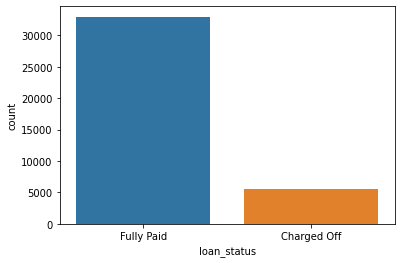

In [34]:
#Count plot to show charged off loans vs fully paid ones
sns.countplot(loan['loan_status'])
plt.show()

The ratio of loans that were Charged Off is less compared to the Fully Paid Loans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


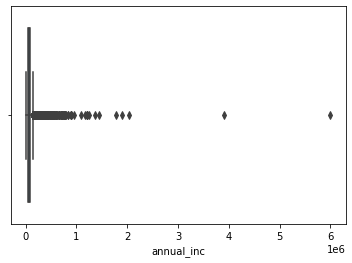

In [35]:
#Check for Outliers
# Anual Income
sns.boxplot(loan['annual_inc'])
plt.show()


In [36]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [37]:
#Getting 25th and 75th percentile values
q1,q3 = loan['annual_inc'].quantile([0.25,0.75])
print(q1," ",q3)

40000.0   82000.0


In [38]:
#Get inter quantile range
iqr = q3-q1
print("IQR is :",iqr)

IQR is : 42000.0


In [39]:
#get lower bound and upper bound for data
lower_bound = q1-(1.5*iqr) 
upper_bound = q3+(1.5*iqr)
print(lower_bound," ",upper_bound)

-23000.0   145000.0


In [40]:
#annual income can't be negative so ignoring lower bound and considering only upper bound
print("Shape of data before clearing outliers in annual income : ", loan.shape)

loan = loan[~(loan['annual_inc']>upper_bound)]
print("Shape of data after clearing outliers in annual income : ",loan.shape)

Shape of data before clearing outliers in annual income :  (38577, 15)
Shape of data after clearing outliers in annual income :  (36815, 15)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


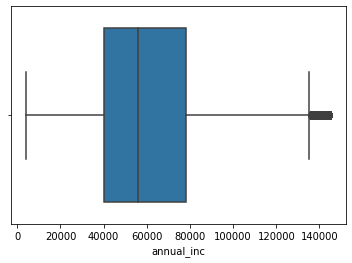

In [41]:
#Box Plot after removing outliers
sns.boxplot(loan['annual_inc'])
plt.show()

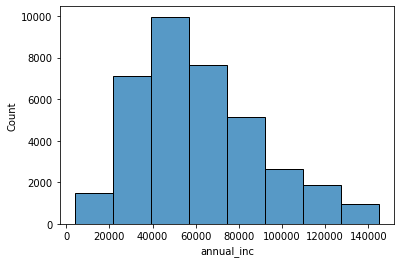

In [42]:
sns.histplot(loan['annual_inc'], bins =8)
plt.show()

In [43]:
#Observation
# The annual_income ranges from 40K to 80K

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


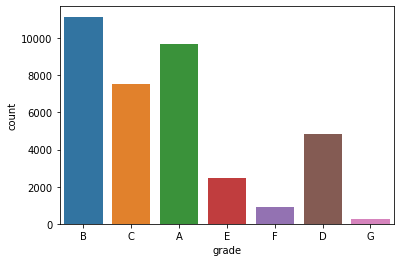

In [44]:
#Checking Loans Provided based on Grade
sns.countplot(loan['grade'])
plt.show()

**Observation**

Number of loans provided were max for A,B,C grade employees

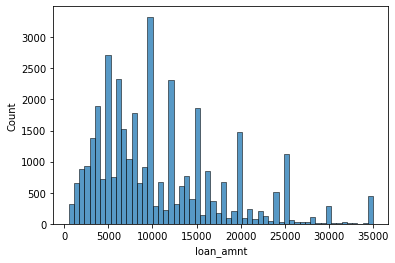

In [45]:
#Loan Amount
sns.histplot(loan['loan_amnt'])
plt.show()

**Observation**

Max loans are between 5000 and 15000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


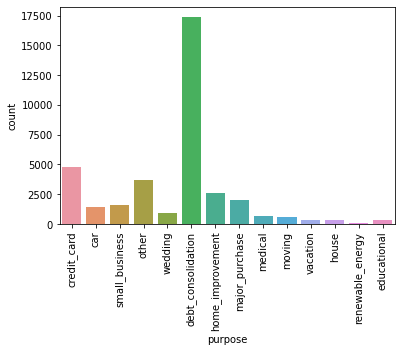

In [46]:
# Purpose
sns.countplot(loan['purpose'])
plt.xticks(rotation = 90)
plt.show()

**Observation**

Max number of loans were given for debt consolidation

##### BiVariate

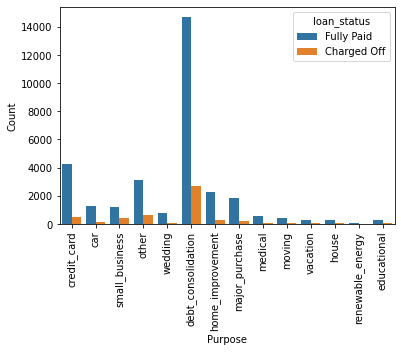

In [47]:
#Comparing Purpose vs Loan Status
purpose_vs_status_plt = sns.countplot(data=loan,x='purpose',hue='loan_status')
purpose_vs_status_plt.set_xlabel('Purpose')
purpose_vs_status_plt.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Observation**

Max loans were Charged off for loans of purpose debt_consolidation 

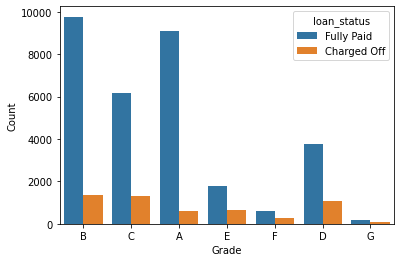

In [48]:
#Comparing Grade vs Loan Status
grade_vs_status_plt = sns.countplot(data=loan,x='grade', hue='loan_status')
grade_vs_status_plt.set_xlabel('Grade')
grade_vs_status_plt.set_ylabel('Count')
plt.show()

**Observation**


Employees with Grade's E,F,G has Higher Charged Off ratio compared to A,B,C,D

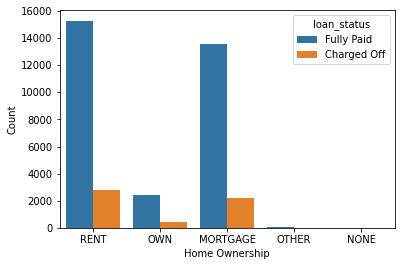

In [49]:
#Comparing Home Ownership vs Loan Status
owner_vs_status_plt = sns.countplot(data=loan, x="home_ownership", hue='loan_status')
owner_vs_status_plt.set_xlabel('Home Ownership')
owner_vs_status_plt.set_ylabel('Count')
plt.show()

**Observation**

People living in Rented homes and Mortgaged homes have taken more loans compared to Owned homes, hence Charged Off is also higher

Text(0, 0.5, 'Count')

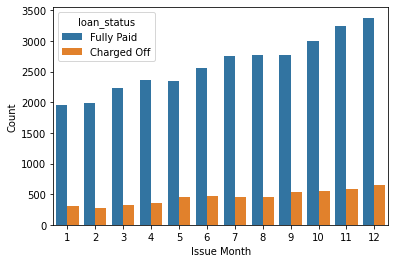

In [50]:
#Checking Month vs Loan Status
issue_mnth_vs_status_plt = sns.countplot(data = loan, x = "issue_month", hue="loan_status")
issue_mnth_vs_status_plt.set_xlabel('Issue Month')
issue_mnth_vs_status_plt.set_ylabel('Count')

**Observation**

Number of loans taken during the year end is higher compared to number of loans taken in year beginning

In [51]:
loan['annual_inc'].describe()

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64

In [52]:
#Validate Annual Income vs Loan Status
#Convert income to Range
def getAnnRangeFromInc(x):
  if x>=0 and x<=20000:
    return '0-20000'
  elif x<=40000:
    return '20001-40000'
  elif x<=80000:
    return '40001-80000'
  else:
    return '80000+'
loan['annual_inc_range'] = loan['annual_inc'].apply(getAnnRangeFromInc)

In [53]:
loan['annual_inc_range'].value_counts()

40001-80000    18884
20001-40000     8518
80000+          8233
0-20000         1180
Name: annual_inc_range, dtype: int64

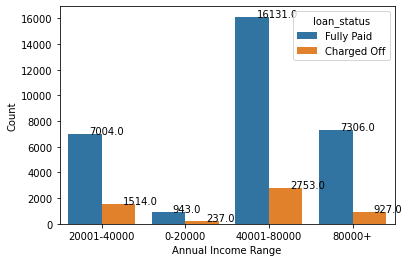

In [54]:
#Create Count Plot with Percentage by comparing Annual Income with Loan Status

incRangeCntPlot = sns.countplot(data=loan,x='annual_inc_range',hue='loan_status')
incRangeCntPlot.set_xlabel('Annual Income Range')
incRangeCntPlot.set_ylabel('Count')
incRangePatches = incRangeCntPlot.patches
total = float(len(loan))

for p in incRangePatches:
   incRangeCntPlot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [55]:

inc_range_vs_status = loan.groupby(by=['annual_inc_range','loan_status'])['loan_status'].count().unstack().reset_index()

print(inc_range_vs_status)

loan_status annual_inc_range  Charged Off  Fully Paid
0                    0-20000          237         943
1                20001-40000         1514        7004
2                40001-80000         2753       16131
3                     80000+          927        7306


In [56]:
def getChargedOffPerc(chargedOff, fullyPaid):
  chargedOffPerc = (chargedOff/ (chargedOff + fullyPaid))*100
  return chargedOffPerc
inc_range_vs_status['chargedOffPerc'] = inc_range_vs_status[['Charged Off','Fully Paid']].apply(lambda x: getChargedOffPerc(*x),axis=1)


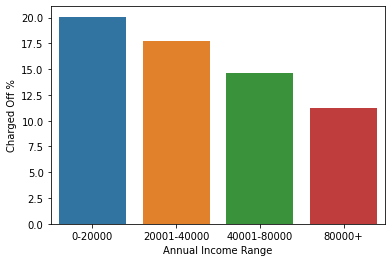

In [57]:
inc_chargeoff_plt = sns.barplot(data = inc_range_vs_status,x='annual_inc_range',y='chargedOffPerc')
inc_chargeoff_plt.set_xlabel('Annual Income Range')
inc_chargeoff_plt.set_ylabel('Charged Off %')
plt.show()

**Observation**

The income range of 0-20000 has more Charged Off Loans

Text(0, 0.5, 'Count')

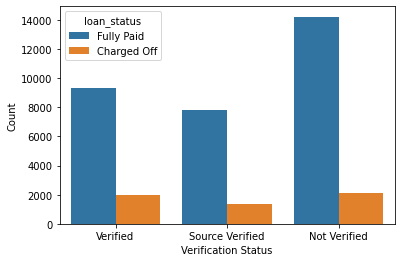

In [58]:
verification_stat_vs_status_plt = sns.countplot(data=loan,x = 'verification_status', hue = 'loan_status')
verification_stat_vs_status_plt.set_xlabel('Verification Status')
verification_stat_vs_status_plt.set_ylabel('Count')

**Observation**

Charged off Ratio is negligible for verification status

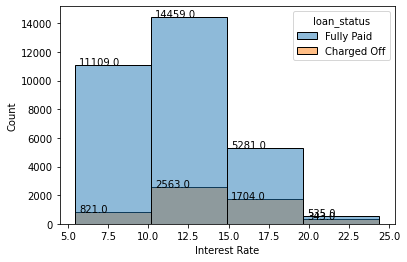

In [59]:
int_vs_status = sns.histplot(data=loan, x='int_rate', hue = 'loan_status', bins = 4)
int_vs_status.set_xlabel('Interest Rate')
int_vs_status.set_ylabel('Count')
for p in int_vs_status.patches:
   int_vs_status.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Text(0, 0.5, 'Interest Rate')

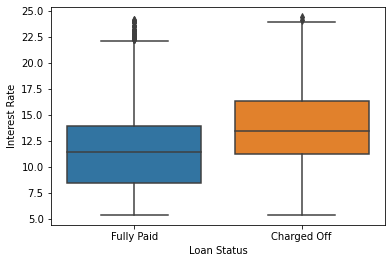

In [60]:
loan_status_vs_interest_rate_plt = sns.boxplot(x='loan_status',y='int_rate',data=loan)
loan_status_vs_interest_rate_plt.set_xlabel('Loan Status')
loan_status_vs_interest_rate_plt.set_ylabel('Interest Rate')

**Observation**

With increase in interest rate the Risk of Charged Off Data is more

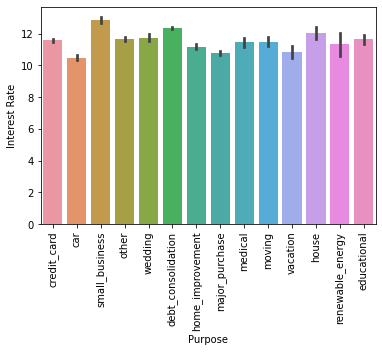

In [61]:
purpose_status_vs_interest_rate_plt =sns.barplot(data=loan,x='purpose',y='int_rate')
purpose_status_vs_interest_rate_plt.set_xlabel('Purpose')
purpose_status_vs_interest_rate_plt.set_ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.show()

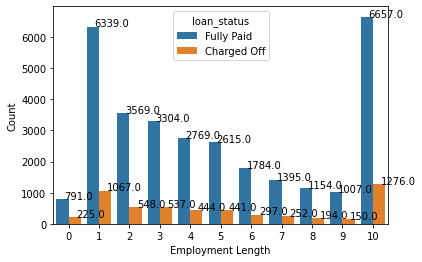

In [62]:
emp_len_vs_status = sns.countplot(data = loan, x = 'emp_length',hue='loan_status')
emp_len_vs_status.set_xlabel('Employment Length')
emp_len_vs_status.set_ylabel('Count')
for p in emp_len_vs_status.patches:
   emp_len_vs_status.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()


**Observation**

Employees with experience between 0-1 tend to charge off their loans

Text(0, 0.5, 'Count')

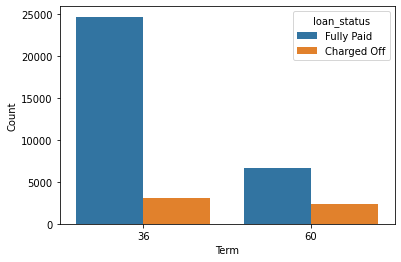

In [63]:
term_vs_status_plt= sns.countplot(data=loan,x='term',hue='loan_status')
term_vs_status_plt.set_xlabel('Term')
term_vs_status_plt.set_ylabel('Count')

**Observation**

Higher Terms have more Charged Off Loans

Text(0, 0.5, 'Interest Rate')

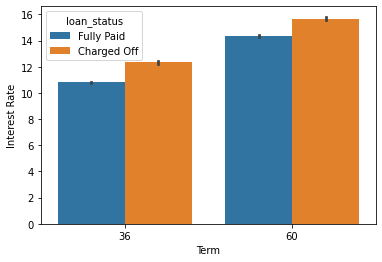

In [64]:
term_vs_interest_rate_plt=sns.barplot(data=loan,x='term',y='int_rate',hue='loan_status')
term_vs_interest_rate_plt.set_xlabel('Term')
term_vs_interest_rate_plt.set_ylabel('Interest Rate')

**Observation**

Higher Terms have more interest Rate and hence the chances for charge off are also high

##### MultiVariate

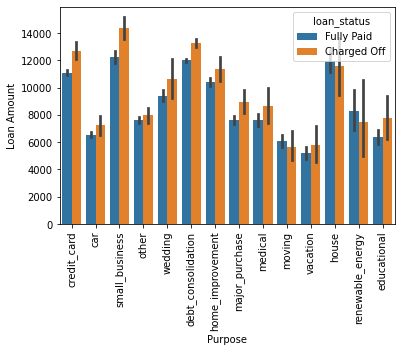

In [65]:


purpose_loanamnt_status_plt = sns.barplot(data=loan, x= 'purpose', y='loan_amnt',hue='loan_status')
purpose_loanamnt_status_plt.set_xlabel('Purpose')
purpose_loanamnt_status_plt.set_ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.show()

**Observation**

People with small businesses have taken higher loans and even that they have higher chances of being charged off

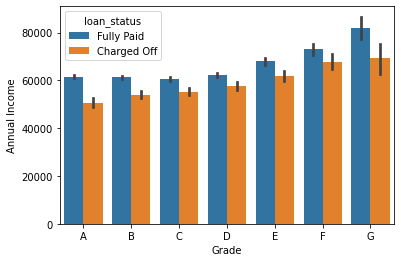

In [66]:
grade_anninc_status_plt = sns.barplot(data=loan, x= 'grade', y='annual_inc',hue='loan_status',order = 'ABCDEFG')
grade_anninc_status_plt.set_xlabel('Grade')
grade_anninc_status_plt.set_ylabel('Annual Income')
plt.show()

**Observation**

The customers whose loans are charged off have less income comparitively

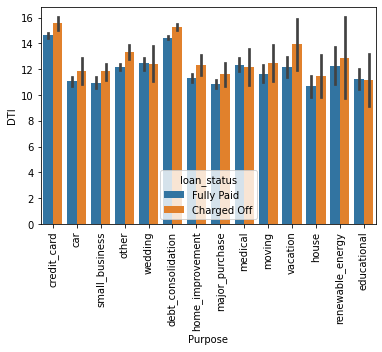

In [67]:
purpose_dti_status_plt = sns.barplot(data=loan, x= 'purpose', y= 'dti', hue='loan_status')
purpose_dti_status_plt.set_xlabel('Purpose')
purpose_dti_status_plt.set_ylabel('DTI')
plt.xticks(rotation=90)
plt.show()

**Observation**

*   People who have higher DTI have risk of being charged off
*   The loan Purpose credit_card and debt_consolidation can be seen to have higher DTI



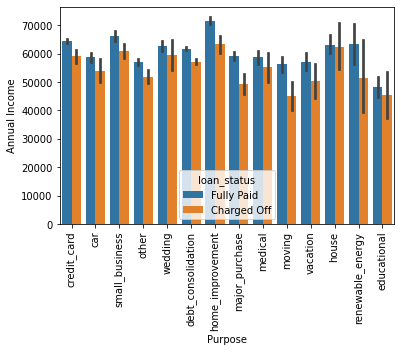

In [68]:
purpose_dti_status_plt = sns.barplot(data=loan, x= 'purpose', y= 'annual_inc', hue='loan_status')
purpose_dti_status_plt.set_xlabel('Purpose')
purpose_dti_status_plt.set_ylabel('Annual Income')
plt.xticks(rotation=90)
plt.show()

**Observation**

Applicants who have taken a loan for small business and have income of 55k -65k.

#### Observations

**The following are the driving factors for defaulter consideration:**

*   Applicants going for loan to repay another loan.
*   When applicants grade is E/F/G.
*   When income is less than 20000.
*   Applicants who receive high interest at the rate of 12-17%
*   Applicants with employment length less than 1 year.
*   When term is 60 months.
*   Dti is above 12.
*   Dti for Credit Card, Vacation & Debt consolidation purpose is high.
*   Applicants who have taken a loan for small business and have income of 55k -65k.





